# imports

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

# task 2

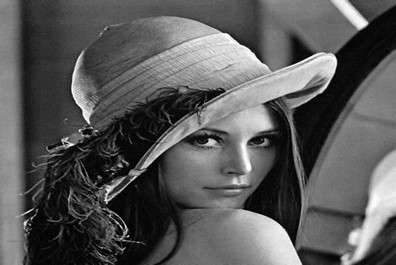

Height: 265, Width: 396, Channels: 3


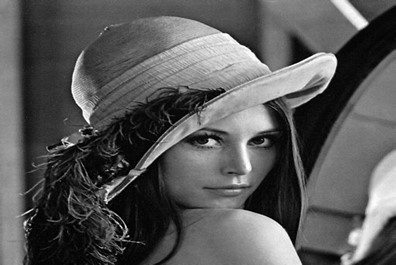

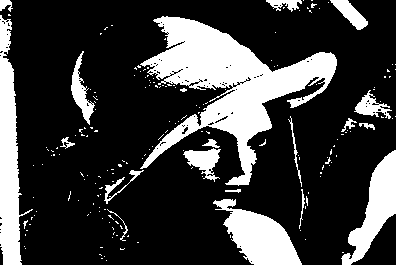

Number of black pixels: 79883


In [6]:
# Read and display the image
image = cv2.imread('/content/Picture2.jpg')
cv2_imshow(image)

# Extract image size
height, width, channels = image.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg', gray_image)
cv2_imshow(gray_image)

# Convert to binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite('binary_image.jpg', binary_image)
cv2_imshow(binary_image)

# Count black pixels
black_pixels = np.sum(binary_image == 0)
print(f"Number of black pixels: {black_pixels}")


# task 2 part 1

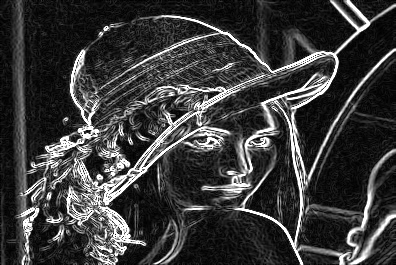

In [9]:
# Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
cv2_imshow(sobel_combined)

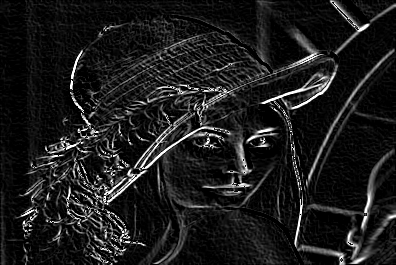

In [10]:
# Prewitt Operator
prewitt_x = cv2.filter2D(gray_image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(gray_image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_combined = prewitt_x + prewitt_y
cv2_imshow(prewitt_combined)

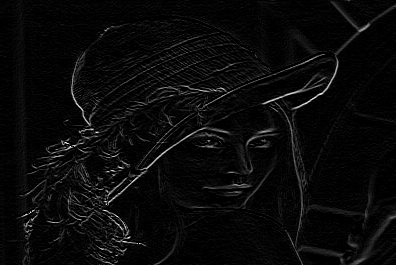

In [11]:
# Roberts Cross Operator
roberts_x = cv2.filter2D(gray_image, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(gray_image, -1, np.array([[0, 1], [-1, 0]]))
roberts_combined = roberts_x + roberts_y
cv2_imshow(roberts_combined)


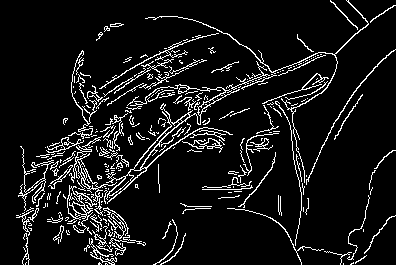

In [12]:
# Canny Edge Detector
canny_edges = cv2.Canny(gray_image, 100, 200)
cv2_imshow(canny_edges)

# task 2 part 2

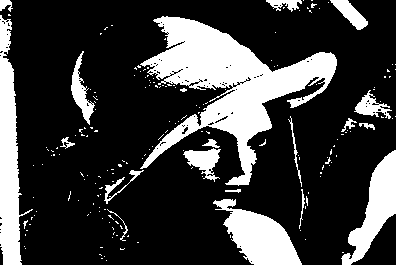

In [14]:
# Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display results
cv2_imshow(global_thresh)

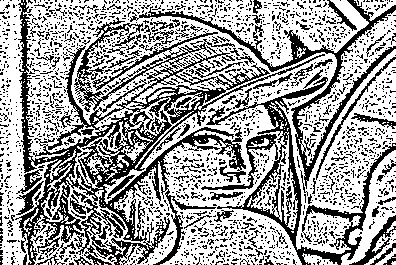

In [18]:
# Adaptive Thresholding (Gaussian)
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Display results
cv2_imshow(adaptive_thresh)


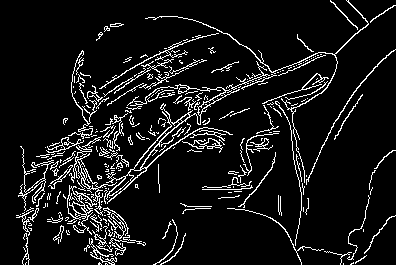

In [16]:
# Canny Edge Detection
edges = cv2.Canny(gray_image, 100, 200)  # Adjust thresholds

# Display results
cv2_imshow(edges)


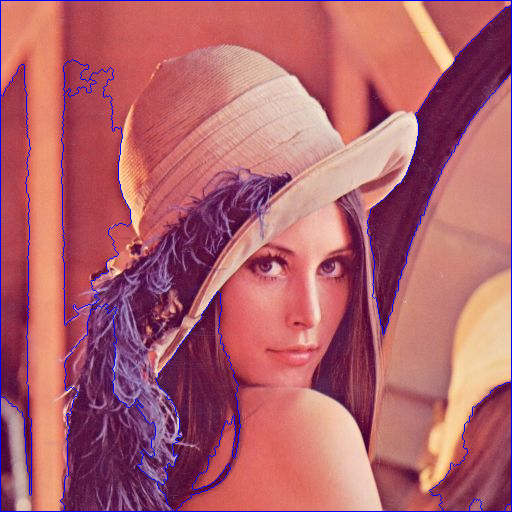

In [20]:
# Read the original image in color
image_color = cv2.imread('/content/colored_picture.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold
_, binary = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove noise using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Determine the background
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Determine the foreground
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Identify unknown regions
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels to ensure the background is not labeled as 0
markers = markers + 1

# Mark the unknown regions as 0
markers[unknown == 255] = 0

# Apply the Watershed algorithm
markers = cv2.watershed(image_color, markers)

# Mark boundaries in the original image
image_color[markers == -1] = [255, 0, 0]  # Boundaries marked in red

# Display results
cv2_imshow(image_color)  # Final segmented image with boundaries
